In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# STEP 1. Скачайте датасет.

Download the Adult training data set: http://archive.ics.uci.edu/ml/datasets/Adult
(file adult.data)

In [2]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

"wget" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [3]:
!head adult.data

"head" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


# Step 2. Поймите формат и зачитайте adult.data в переменную df. Используйте cols чтобы дать нормальные названия колонкам.

Обратите внимание на формат!

In [2]:
cols = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'result']

In [3]:
df=pd.read_csv('adult.data',sep=', ', header=None,names=cols)


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [5]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,result
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
df.shape

(32561, 15)

# Сколько мужчин и женщин?

In [7]:
df.sex.value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

# Средний возраст мужчин и женщин?

In [8]:
df.groupby('sex').age.mean()

sex
Female    36.858230
Male      39.433547
Name: age, dtype: float64

# Какая доля граждан США (United-States) в данном датасете?

In [9]:
(df['native-country'].loc[df['native-country']=='United-States'].count())/(df['native-country'].count())

0.895857006848684

# Нарисуйте распределние образования людей (используйте bar plot)

Подпишите график и оси.

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education-num, dtype: int64


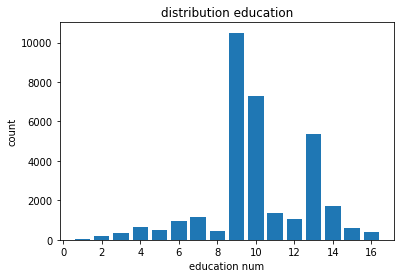

In [10]:
educ_plot=df['education-num'].value_counts()
print(educ_plot)
plt.bar(educ_plot.keys(), educ_plot.values);
plt.title('distribution education');
plt.xlabel('education num');
plt.ylabel('count');

# Какое среднее значние и квадратичное отклонение (std) fnlwgt (”final weight”) разведенных (divorced people) людей. Нарисуйте гистрограмму (Какое распределение оно вам напоминает?)

In [11]:
mean_fnlwgt=df.loc[df['marital-status']=='Divorced'].fnlwgt.mean()
mean_fnlwgt

185802.79045689848

In [12]:
std_fnlwgt=df.loc[df['marital-status']=='Divorced'].fnlwgt.std()
std_fnlwgt

105646.78945933603

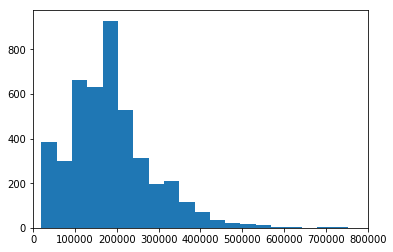

In [13]:
plt.hist(df.loc[df['marital-status']=='Divorced'].fnlwgt,bins=40);
plt.xlim([0, 800000]);

> Ответ: оно мне напоминает хи-квадрат распределение

# Правда ли, что большинство людей, из тех кто получает больше 50k, с высшим образованием  (BSc, MSc, PhD - ????)

In [14]:
np.unique(df.result.values)

array(['<=50K', '>50K'], dtype=object)

In [15]:
np.unique(df.education.values)

array(['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th',
       'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad',
       'Masters', 'Preschool', 'Prof-school', 'Some-college'],
      dtype=object)

In [16]:
df.loc[(df.result=='>50K') & (df.education.isin(['Bachelors','Doctorate','Masters']))].education.count()

3486

In [17]:
df.loc[(df.result=='>50K') & (~df.education.isin(['Bachelors','Doctorate','Masters']))].education.count()

4355

> Ответ: Нет

# Сколько в среднем работают люди в неделю в зависимости от education?

In [18]:
hours_per_week_educ=df.groupby('education-num')['hours-per-week'].mean()
hours_per_week_educ

education-num
1     36.647059
2     38.255952
3     38.897898
4     39.366873
5     38.044747
6     37.052519
7     33.925957
8     35.780600
9     40.575374
10    38.852284
11    41.610709
12    40.504217
13    42.614006
14    43.836332
15    47.425347
16    46.973366
Name: hours-per-week, dtype: float64

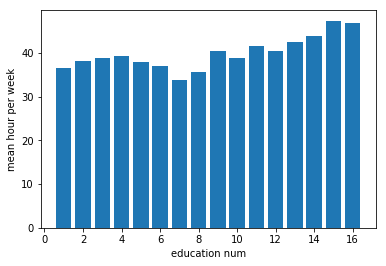

In [19]:
plt.bar(hours_per_week_educ.keys(), hours_per_week_educ.values);
plt.xlabel('education num');
plt.ylabel('mean hour per week');

# Кто больше работает в неделю - мужчины или женщины?

In [20]:
df.groupby('sex')['hours-per-week'].mean()

sex
Female    36.410361
Male      42.428086
Name: hours-per-week, dtype: float64

> Ответ: мужчины

# Кто больше работает в неделю - те кто в отношениях или те кто нет?

In [21]:
np.unique(df['marital-status'].values)

array(['Divorced', 'Married-AF-spouse', 'Married-civ-spouse',
       'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed'],
      dtype=object)

In [22]:
np.unique(df.relationship.values)

array(['Husband', 'Not-in-family', 'Other-relative', 'Own-child',
       'Unmarried', 'Wife'], dtype=object)

In [5]:
df[df['marital-status'].isin(['Married-AF-spouse', 'Married-civ-spouse',
       'Married-spouse-absent'])]['hours-per-week'].mean()

43.183628462087306

In [6]:
df[~df['marital-status'].isin(['Married-AF-spouse', 'Married-civ-spouse',
       'Married-spouse-absent'])]['hours-per-week'].mean()

37.96791880541297

>Ответ: работают больше люди в отношениях ('Married-AF-spouse', 'Married-civ-spouse' или
       'Married-spouse-absent' в поле 'marital-status')

# Из каких стран люди работают farmers/fishers?

In [25]:
np.unique(df.occupation.values)

array(['?', 'Adm-clerical', 'Armed-Forces', 'Craft-repair',
       'Exec-managerial', 'Farming-fishing', 'Handlers-cleaners',
       'Machine-op-inspct', 'Other-service', 'Priv-house-serv',
       'Prof-specialty', 'Protective-serv', 'Sales', 'Tech-support',
       'Transport-moving'], dtype=object)

In [27]:
list(np.unique(df.loc[df.occupation=='Farming-fishing']['native-country']))

['?',
 'Cambodia',
 'Canada',
 'Cuba',
 'El-Salvador',
 'England',
 'France',
 'Germany',
 'Guatemala',
 'Hong',
 'Ireland',
 'Italy',
 'Japan',
 'Mexico',
 'Philippines',
 'Poland',
 'Portugal',
 'Puerto-Rico',
 'United-States',
 'Vietnam',
 'Yugoslavia']

# Сколько максимум работают люди в неделю? Как много таких людей кто работает наибольшее количество часов? Какой у них доход (распечатать)?

In [30]:
max_hours=df['hours-per-week'].max()
max_hours

99

In [33]:
df['hours-per-week'].loc[df['hours-per-week']==max_hours].count()


85

In [37]:
list(np.unique(df.loc[df['hours-per-week']==max_hours]['result']))

[0, 2354, 2407, 2907, 4386, 4416, 6418, 15024]